Lokales Binärbild gespeichert unter: c:\Users\victo\SynologyDrive\Studium\molekulare Biotechnologie\Heidelberg\Bioinformatik\Projekt\Otsu Treshhold\Otsu_Thresholding_LocalWork\topic01_team03\output\t01_binary_local.png


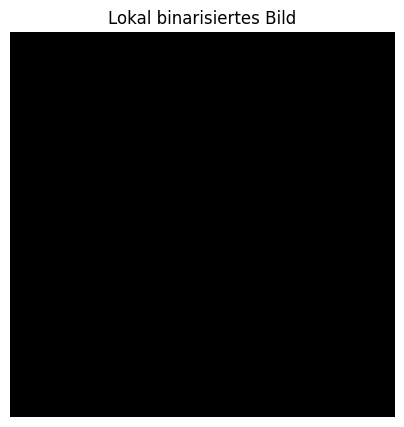

In [1]:
import os
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Projektstruktur festlegen
project_root = os.getcwd()
src_dir = os.path.join(project_root, "src")
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

# Importiere die Funktion aus deinem Modul
from otsu_local import otsu_threshold

# Output-Verzeichnis erstellen
output_dir = os.path.join(project_root, "output")
os.makedirs(output_dir, exist_ok=True)

# Bild laden und vorbereiten
img_path = os.path.join(project_root, "Data", "N2DH-GOWT1", "img", "t01.tif")
pil_image = Image.open(img_path).convert("L")
img_array = np.array(pil_image)

# Parameter für lokale Binarisierung
tile_size = 64
h, w = img_array.shape
binary_local = np.zeros_like(img_array, dtype=bool)

# Lokale Otsu-Schwelle in Tiles berechnen
for y in range(0, h, tile_size):
    for x in range(0, w, tile_size):
        tile = img_array[y:y+tile_size, x:x+tile_size]
        if tile.size == 0:
            continue
        t = otsu_threshold(tile)
        binary_local[y:y+tile_size, x:x+tile_size] = tile > t

# Binärbild speichern
binary_uint8 = (binary_local.astype(np.uint8) * 255)
output_path = os.path.join(output_dir, "t01_binary_local.png")
Image.fromarray(binary_uint8).save(output_path)
print(f"Lokales Binärbild gespeichert unter: {output_path}")

# Visualisierung
plt.figure(figsize=(5, 5))
plt.imshow(binary_local, cmap="gray")
plt.title("Lokal binarisiertes Bild")
plt.axis("off")
plt.show()
